# Introduction
We will use the Nearest Neighbor algorithm, including k-Nearest Neighbors (KNN) and Radius Neighbors (RNN), using the Breast Cancer dataset. We will demonstrate how the choices of k and radius affect the classification results and compare the performance of different models.

# K-Nearest Neighbors (KNN)

## Overview
**K-Nearest Neighbors (KNN)** is a simple, instance-based learning algorithm used for classification and regression. It works by finding the **k** nearest data points (neighbors) in the training set to a new observation, based on a distance metric like **Euclidean distance**.

## How KNN Works
1. For a given data point, calculate the distance to every other point in the dataset.
2. Identify the **k** nearest neighbors based on the shortest distance.
3. For classification, assign the class label based on a majority vote from the **k** neighbors. For regression, return the average of the **k** neighbors' target values.

### Euclidean Distance Formula
To calculate the distance between two points \( x_1 \) and \( x_2 \) in an n-dimensional space:

$$
d(x_1, x_2) = \sqrt{\sum_{i=1}^{n} (x_{1,i} - x_{2,i})^2}
$$

Where:
- \( x_1 \) and \( x_2 \) are the feature vectors of two data points.
- \( d(x_1, x_2) \) is the Euclidean distance.

## Advantages of KNN
- **Simple and intuitive**: Easy to implement and understand.
- **Non-parametric**: KNN makes no assumptions about the underlying data distribution.
- **Effective with small datasets**: KNN can perform well on small, well-labeled datasets.

## Limitations of KNN
- **Computationally expensive**: Finding the nearest neighbors requires calculating distances to all other points in the dataset.
- **Sensitive to irrelevant features**: The algorithm considers all features equally, which can reduce performance if irrelevant features are present.
- **Curse of dimensionality**: KNN struggles with high-dimensional data because the distance between points becomes less meaningful.

---

# Radius Nearest Neighbors (RNN)

## Overview
**Radius Nearest Neighbors (RNN)** is similar to KNN but instead of finding a fixed number of neighbors, it finds all neighbors within a specified **radius** around the data point. It is particularly useful in situations where data density varies.

## How RNN Works
1. For a given data point, RNN finds all neighbors within a given radius \( R \).
2. For classification, it assigns the class label based on a majority vote of the neighbors within the radius. For regression, it returns the average target value of those neighbors.

### Distance and Radius
The algorithm considers all points within a specified distance \( R \):

$$
\text{Neighbors} = \{x_j : d(x_i, x_j) \leq R\}
$$

Where:
- \( d(x_i, x_j) \) is the distance between the data points \( x_i \) and \( x_j \).
- \( R \) is the radius within which neighbors are considered.

## Advantages of RNN
- **Adaptable to varying densities**: The algorithm can adapt to different data densities by adjusting the radius.
- **Less sensitive to outliers**: Outliers outside the radius are ignored.

## Limitations of RNN
- **Choosing the right radius**: Setting an appropriate radius \( R \) can be difficult. A small radius may result in no neighbors, while a large radius may include irrelevant points.
- **Computational complexity**: Similar to KNN, RNN can be computationally expensive, especially with large datasets.

---

# Setup
Import necessary librairies and load the Breast Cancer dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the dataset into training and testing sets

In [3]:
# Split the data into training and test sets (80% training, 20% test)
# random_state is set to 42 to ensure reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the k-Nearest Neighbors (KNN) model

In [4]:
# create a list of k values for KNN
k_values = [1, 5, 11, 15, 21]

# Train KNN models with different k values and store the resuslts
knn_results = {}
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    knn_results[k] = {
        'model': knn,
        'y_pred': y_pred,
        'accuracy': accuracy_score(y_test, y_pred)
    }

# Create and train the Radius Neighbors (RNN) model

In [5]:
radius_values = [350, 400, 450, 500, 550]

# Train KNN models with different k values and store the resuslts
rnn_results = {}
for radius in radius_values:
    rnn = RadiusNeighborsClassifier(radius=radius)
    rnn.fit(X_train, y_train)
    y_pred = rnn.predict(X_test)
    rnn_results[radius] = {
        'model': rnn,
        'y_pred': y_pred,
        'accuracy': accuracy_score(y_test, y_pred)
    }

# Compare the performance of KNN and RNN models

In [6]:
# Print the accuracy of KNN models
print('KNN Accuracy:')
for k, result in knn_results.items():
    print(f'k={k}: {result["accuracy"]:.2f}')

# Print the accuracy of RNN models
print('\nRNN Accuracy:')
for radius, result in rnn_results.items():
    print(f'radius={radius}: {result["accuracy"]:.2f}')

KNN Accuracy:
k=1: 0.93
k=5: 0.96
k=11: 0.98
k=15: 0.96
k=21: 0.96

RNN Accuracy:
radius=350: 0.94
radius=400: 0.94
radius=450: 0.94
radius=500: 0.91
radius=550: 0.90


# Visualize the prediction results for KNN and RNN

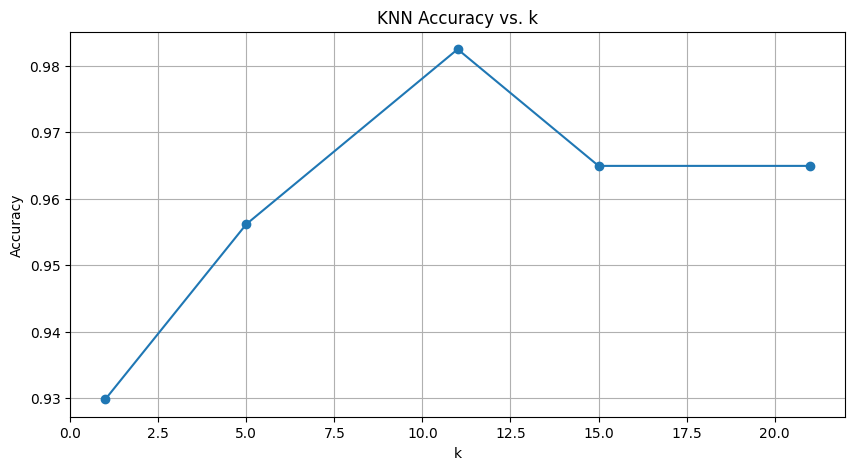

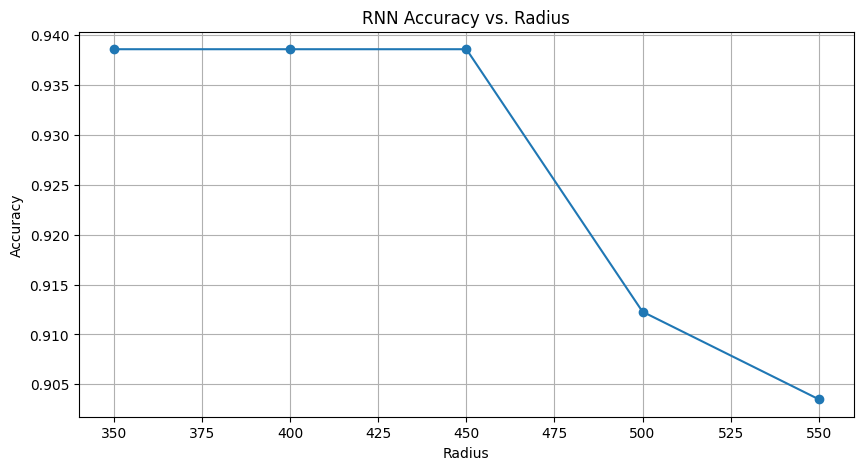

In [7]:
# Visualize the accuracy of KNN models
k_values = [k for k in knn_results.keys()]
k_accuraries = [result['accuracy'] for result in knn_results.values()]

plt.figure(figsize=(10, 5))
plt.plot(k_values, k_accuraries, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. k')
plt.grid(True)
plt.show()

# Visualize the accuracy of RNN models
radius_values = [radius for radius in rnn_results.keys()]
radius_accuraries = [result['accuracy'] for result in rnn_results.values()]

plt.figure(figsize=(10, 5))
plt.plot(radius_values, radius_accuraries, marker='o')
plt.xlabel('Radius')
plt.ylabel('Accuracy')
plt.title('RNN Accuracy vs. Radius')
plt.grid(True)
plt.show()

In [8]:
# Confusion matrix for KNN with k=5
knn = knn_results[5]['model']
y_pred = knn_results[5]['y_pred']
cm = confusion_matrix(y_test, y_pred)
print('KNN Confusion Matrix (k=5):')
print(cm)


KNN Confusion Matrix (k=5):
[[38  5]
 [ 0 71]]
